# BCB546X Python Assignment - JR

## This notebook contains the description and codes used for the Python assignment

### Following are the packages used 

##### 1. Finishing documenting the given function with comments

In [151]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import numpy as np

In [152]:
def get_sequences_from_file(fasta_fn): # defining the function 
    sequence_data_dict = {} # creating an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): # parsing all the fasta files using Seq10 to read FASTA file and store in a SeqRecord 
        description = record.description.split() # splitting each word in the description
        species_name = description[1] + " " + description[2] # assigning the second and third columns of the data file as species name
        sequence_data_dict[species_name] = record.seq #adding the species name and sequence to the dictionary
    return(sequence_data_dict) #return the dictionary as the result of the functio

##### 2. Translating a string of nucleotides to amino acids

In [153]:
def translate_CDS_function(X):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # import the genetic code for Vertebrate Mitochondria
    AA_seq = '' # creating an empty variable for aa sequence
    for i in range(0, len(X), 3): # pooling every 3 nucleotides throughout the entire lenght of the nucleotide seuqnce starting at the first position i.e.0   
        codon = X[i : i+3] # extracting the codons which is every 3 nucleotide sequence
        if codon not in mito_table.stop_codons and len(codon) == 3: # AA added for each codon with nucleotide without a stop codon 
            AA_seq += mito_table.forward_table[codon]
            
    return(AA_seq) 


In [154]:
test_CDS = "ATGCTATCGCTAGCTAGCTAGCTAG" # a small random CDS as a test sequence
test_DNA_sequence = "ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT" # a small part of DNA sequence from the sequence file as a test sequence 

In [155]:
translate_CDS_function(test_CDS)

'MLSLASL'

In [156]:
translate_CDS_function(test_DNA_sequence)

'MTNIRKTHPLAKIINNSF'

##### 3. Alternative translation function using Biopython

In [157]:
def Alt_translate(X):
    from Bio.Seq import Seq # adding seq from Bio.Seq package
    seq = Seq(X) # Saving the given sequence as a Seq object
    AA_seq = seq.translate(table=2, to_stop=True) # Alternatively translating the sequence using the vertebrate mitochondrial code (genetic code 2)and stopping whenever there is a stop codon 
    return(str(AA_seq))
    
Alt_translate(test_DNA)

'MTNIRKTHPLAKIINNSF'

##### 4. Calculating the molecular weight of each amino acid sequence


In [158]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(AA_seq):
    Analyzed_seq = ProteinAnalysis(AA_seq) # analyzing the aa sequence
    molecular_weight = Analyzed_seq.molecular_weight() # calculating the molecular weigth 
    return(molecular_weight) 

In [159]:
compute_molecular_weight("MTNIRKTHPLAKIINNSF")

2098.4711

##### 5. Computing the GC-content of each DNA sequence

In [160]:
from Bio.SeqUtils import GC # importing the function for GC-content from SeqUtils

def gc_content_function(nucleotides):
    gc_content = GC(nucleotides) # calculating the GC content
    return(gc_content) 

In [161]:
gc_content_function("ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT")

35.18518518518518

In [162]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df1 = pd.read_csv("bears_mass.csv") # Using only body mass and loading the csv file as a dataframe
species_list = list(bears_df1.species) #making a list of species names)

In [163]:
cytb_seqs

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA'),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA'),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA'),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA'),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA'),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA'),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA')}

##### 6. Adding two new columns to the DataFrame: (1) molecular weight and (2) GC content.

In [164]:
bears_df1['molecular_weight'] = float("NaN")
bears_df1['gc_content'] = float("NaN")

##### 7. Using functions from step 3 , 4 and 5 and fill in the new columns in the DataFrame.

In [165]:
for key in cytb_seqs: #iterate throught the key in the dictionary
    DNA_seq = str(cytb_seqs[key]) # importing sequence data in the dictionary according to the key and saving them as string
    aa_seq = translate_CDS_function(DNA_seq) #calling a translate function to get aa seq
    bears_df1.loc[bears_df1.species == key,'molecular_weight'] = compute_molecular_weight(aa_seq) #saveing the molecular weight of each species in a new column
    bears_df1.loc[bears_df1.species == key,'gc_content'] = gc_content_function(DNA_seq) #saves the GC content of each species in a new column

In [166]:
bears_df1

,species,mass,molecular_weight,gc_content
0,Ursus spelaeus,550.800,42458.7992,43.771930
1,Ursus arctos,203.500,42414.7435,43.771930
2,Ursus thibetanus,99.714,42306.6735,45.614035
3,Melursus ursinus,100.030,42551.9900,45.175439
4,Ursus americanus,110.560,42427.7439,43.947368
5,Helarctos malayanus,47.020,42560.8910,44.298246
6,Ailuropoda melanoleuca,118.200,42702.1845,40.789474
7,Tremarctos ornatus,140.700,42384.8266,44.385965
8,Ursus maritimus,425.100,42454.7873,44.298246


##### 8.  Plot a bar-chart of the mass with the x-axes labeled with species names.

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [168]:
%matplotlib inline

In [212]:
plot_dims = (20, 12) #defining dimensions of the graph

[Text(0.5, 0, 'species_names'), Text(0, 0.5, 'mass')]

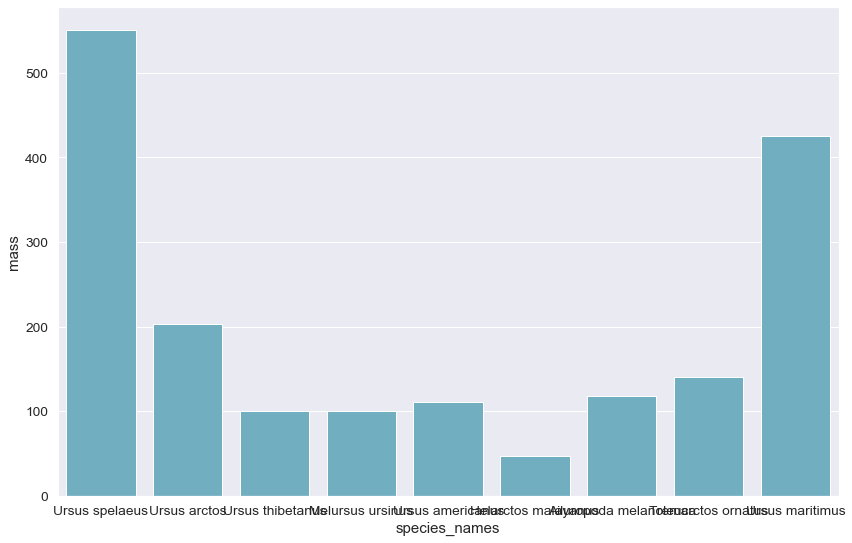

In [209]:
fig, ax = plt.subplots(figsize = plot_dims)  # using the defined dimensins of the graph
sns.barplot(x='species', y='mass', color ='c', data = bears_df1)  # creating a bar chart of species vs mass
ax.set(xlabel = 'species_names', ylabel = 'mass') # setting the axes labels


1)Ursus spelaeus is the largest species.
2) Ursus spelaeus or cave bear can be weighed upto 1000kg and they are now extinct. They were also vegetarians

##### 9. Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

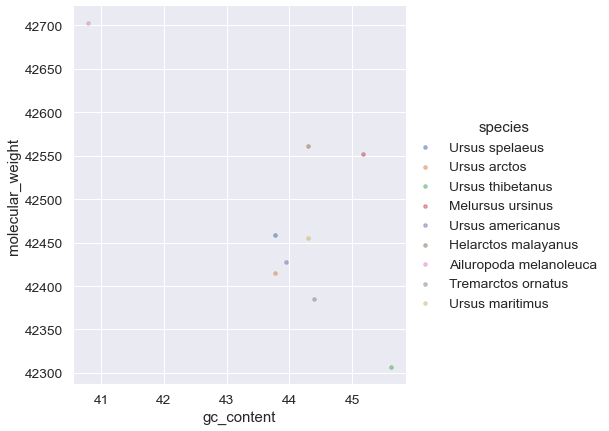

In [227]:
sns.lmplot(x="gc_content", y="molecular_weight", data=bears_df1, 
           fit_reg=False, height=6, aspect=1, scatter_kws={'alpha':0.5,"s": 50}, 
           hue='species', markers='.') # Making a scatter plot and setting the dimensions, color,etc.

##### 10. Saving the new DataFrame to a file called "bears_mass_cytb.csv"

In [228]:
bears_df1.to_csv("bears_mass_cytb.csv", index = False)

##### 11. Bonus
This data set can be visualized in other ways:
a. The body mass distribution can be visualized as a histogram which shows that 2 of 9 are the same size. The colour can also be changed

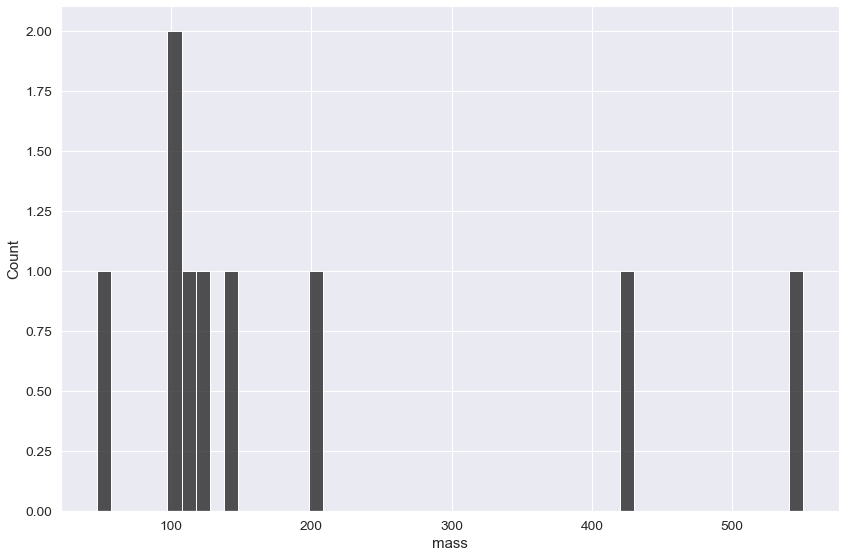

In [233]:
sns.displot(bears_df1['mass'], color='k',bins=50, height=8, aspect=1.5,)

The AA sequence can be added to the data frame and each AA can be computed to see how many times it appears for understanding the function of the protein.


In [234]:
bears_df1_copy = bears_df1

In [287]:
for key in cytb_seqs: 
    DNA_seq = str(cytb_seqs[key])
    aa_seq = translate_CDS_function(DNA_seq)
    bears_df1.loc[bears_df1_copy.species == key,'aa_seq'] = (aa_seq) #saving the aa sequence in a new column
    

In [239]:
bears_df1_copy

,species,mass,molecular_weight,gc_content,aa_seq
0,Ursus spelaeus,550.800,42458.7992,43.771930,MTNIRKTHPLAKIINNSFIDLPTPSNISAWWNFGSLLGVCLILQIL...
1,Ursus arctos,203.500,42414.7435,43.771930,MTNIRKTHPLAKIINNSLIDLPTPSNISAWWNFGSLLGVCLILQIL...
2,Ursus thibetanus,99.714,42306.6735,45.614035,MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGMCLILQIL...
3,Melursus ursinus,100.030,42551.9900,45.175439,MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGVCLILQIL...
4,Ursus americanus,110.560,42427.7439,43.947368,MTNIRKTHPLAKIINNSLIDLPTPSNISAWWNFGSLLGVCLVLQIL...
5,Helarctos malayanus,47.020,42560.8910,44.298246,MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGVCLILQIM...
6,Ailuropoda melanoleuca,118.200,42702.1845,40.789474,MINIRKTHPLVKIINNSFIDLPTPSNISTWWNFGSLLGVCLILQIL...
7,Tremarctos ornatus,140.700,42384.8266,44.385965,MTNIRKTHPLAKIINSSFIDLPTPSNISAWWNFGSLLGVCLILHIL...
8,Ursus maritimus,425.100,42454.7873,44.298246,MTNIRKTHPLAKIINNSFIDLPTPSNISAWWNFGSLLGVCLILQIL...


In [285]:
aa_seq.count('P')

23

In [286]:
aa_seq.count('M')

10